In [1]:
import pandas as pd

In [2]:
df_players = pd.read_csv('jugadores_cebollitas.csv')
df_players.head()

,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047


In [3]:
from sklearn.cluster import KMeans

X = df_players[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']]

kmeans = KMeans(n_clusters=3, random_state=42)
df_players['cluster'] = kmeans.fit_predict(X)


c:\Users\jaayg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
numeric_columns = ['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']
cluster_means = df_players.groupby('cluster')[numeric_columns].mean()
print(cluster_means)

         goles  asistencias  pases_completados (%)  tiros_al_arco
cluster                                                          
0          3.6          3.6                  80.04           44.8
1          2.6          4.9                  87.29            3.3
2          2.6          4.4                  78.34            9.0


C:\Users\jaayg\AppData\Local\Temp\ipykernel_22320\1315821140.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_players, palette='Set2')


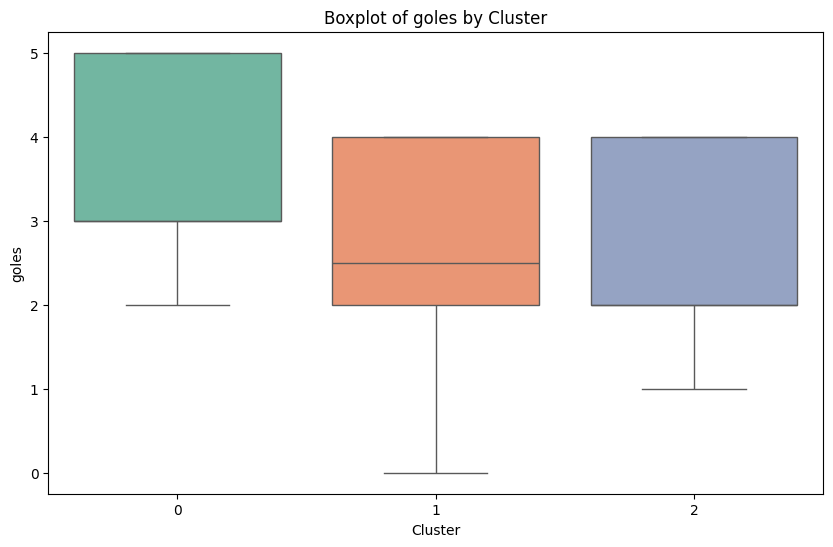

C:\Users\jaayg\AppData\Local\Temp\ipykernel_22320\1315821140.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_players, palette='Set2')


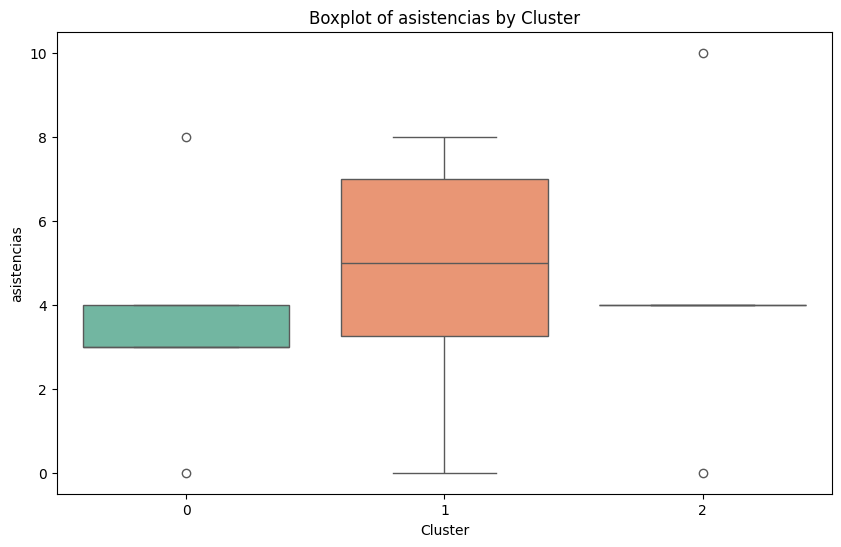

C:\Users\jaayg\AppData\Local\Temp\ipykernel_22320\1315821140.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_players, palette='Set2')


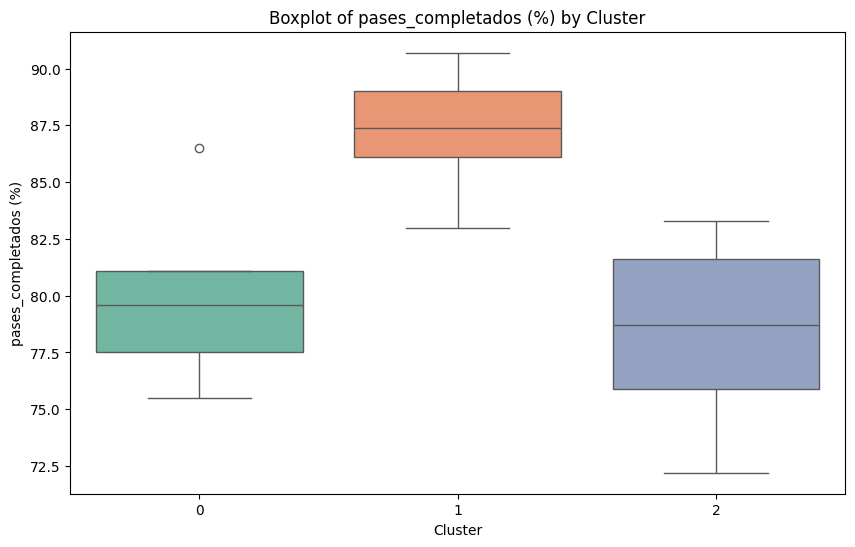

C:\Users\jaayg\AppData\Local\Temp\ipykernel_22320\1315821140.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_players, palette='Set2')


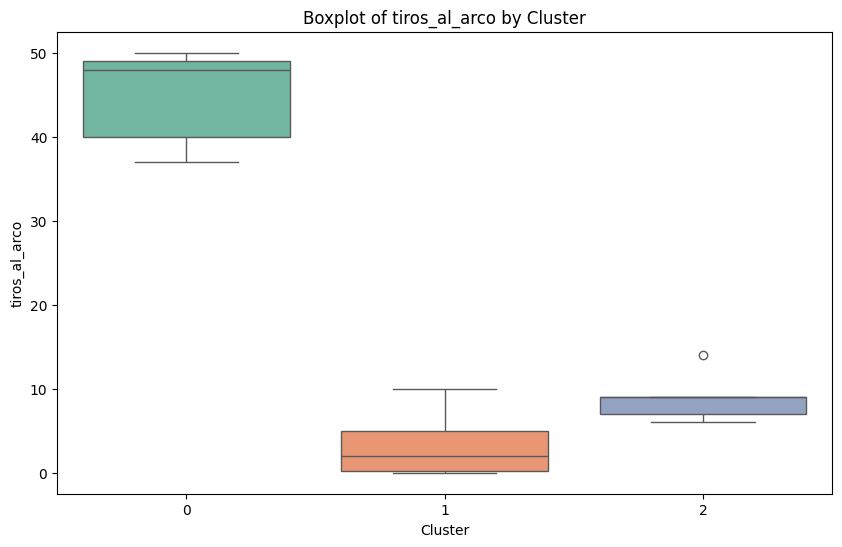

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

featrues = ['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']

for feature in featrues:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=feature, data=df_players, palette='Set2')
    plt.title(f'Boxplot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

In [6]:
import ipywidgets as widgets
from IPython.display import display

cluster_selector = widgets.Dropdown(
    options=sorted(df_players['cluster'].unique()),
    description='Select Cluster:',
)

def showing_players(cluster):
    selected_players = df_players[df_players['cluster'] == cluster]
    display(selected_players[['nombre', 'goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']])

widgets.interactive(showing_players, cluster=cluster_selector)

interactive(children=(Dropdown(description='Select Cluster:', options=(np.int32(0), np.int32(1), np.int32(2)),…